<a href="https://colab.research.google.com/github/2004Likhitha/AIML/blob/main/Copy_of_AIML_III_Module_01_Lab_02_Machine_Learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning terms and metrics

Module 1, Lab 2

In this lab, we will show a part of the ML pipeline by using the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. We will use the scikit-learn library to load the data and perform some basic data preprocessing and model training. We will also show how to evaluate the model using some common metrics, split the data into training and testing sets, and use cross-validation to get a better estimate of the model's performance.

In [8]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)

In [9]:
import numpy as np
from sklearn.datasets import load_iris

# Load the Iris dataset
dataset = load_iris()

# Print the dataset description
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Given below are the list of target values. These correspond to the house value derived considering all the 8 input features and are continuous values. We should use regression models to predict these values but we will start with a simple classification model for the sake of simplicity. We need to just round off the values to the nearest integer and use a classification model to predict the house value.

In [10]:
print("Orignal target values:", dataset.target)

dataset.target = dataset.target.astype(int)

print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)

Orignal target values: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Target values after conversion: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Input variables shape: (150, 4)
Output variables shape: (150,)


The simplest model to use for classification is the K-Nearest Neighbors model. We will use this model to predict the house value with a K value of 1. We will also use the accuracy metric to evaluate the model.

In [11]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [12]:
def RandomClassifier(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the random classifier algorithm

    In reality, we don't need these arguments but we are passing them to keep the function signature consistent with other classifiers

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is a random label from the training data
    """

    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

We need a metric to evaluate the performance of the model. Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. We will use the accuracy metric to evaluate and compate the performance of the K-Nearest Neighbors model and the random classifier.

In [13]:
def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

Let us make a function to split the dataset with the desired probability. We will use this function to split the dataset into training and testing sets. We will use the training set to train the model and the testing set to evaluate the model.

In [14]:
def split(data, label, percent):
    # generate a random number for each sample
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [15]:
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 20 / 100
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 32
Number of train samples: 118
Percent of test data: 21.333333333333332 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [17]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)

What is the accuracy of our classifiers on the train dataset?

In [18]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy*100, "%")

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier: ", trainAccuracy*100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier:  29.411764705882355 %


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case. This is because the random classifier randomly assigns a label to each sample and the probability of assigning the correct label is 1/(number of classes). Let us predict the labels for our validation set and get the accuracy. This accuracy is a good estimate of the accuracy of our model on unseen data.

In [19]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")


valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 93.93939393939394 %
Validation accuracy using random classifier: 24.242424242424242 %


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. Now let us try another random split and check the validation accuracy. We will see that the validation accuracy changes with the split. This is because the validation set is small and the accuracy is highly dependent on the samples in the validation set. We can get a better estimate of the accuracy by using cross-validation.

In [20]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 94.44444444444444 %


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [21]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

Test accuracy: 96.875 %


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

Answers:
1. If we increase the validation set the model's performance will increase as it generalizes the new data(unseen data). But as we increase validation data the training data decreases which can lead to poorer training of the model and as a result it may not give accurate results.
Decreasing the validation set size can result in better training set performance (higher training accuracy), but at the risk of less reliable validation accuracy and potentially overfitting.

2. The model is trained using the training set, where it learns patterns and relationships in the data. The trained model is then used to make predictions on the validation set, which consists of data that the model has not seen during training.The predictions made by the model on the validation set are compared against the actual known outcomes (ground truth). Accuracy is calculated as the percentage of correct predictions over the total number of predictions made.The accuracy obtained on the validation set serves as an estimate of how well the model is expected to perform on new, unseen data (including the test set). It provides insights into the model's ability to generalize beyond the training data.
The size of the train and validation sets directly impacts the reliability of predicting accuracy on the test set using the validation set. A larger training set allows the model to learn more complex patterns, potentially improving its performance on both the training and validation sets. However, a smaller validation set might lead to less reliable estimates of generalization to unseen data. Conversely, a larger validation set provides a more robust assessment of model performance but reduces the amount of data available for training.

3. To split the dataset into 70-80% for training and 20-30% for validation is good percentage so that the two factors can be balanced

> Exercise: Try to implement a 3 nearest neighbour classifier and compare the accuracy of the 1 nearest neighbour classifier and the 3 nearest neighbour classifier on the test dataset. You can use the KNeighborsClassifier class from the scikit-learn library to implement the K-Nearest Neighbors model. You can set the number of neighbors using the n_neighbors parameter. You can also use the accuracy_score function from the scikit-learn library to calculate the accuracy of the model.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.metrics import classification_report

# Load the iris dataset
iris = datasets.load_iris()

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)

print("Size of training data and its label", x_train.shape, y_train.shape)
print("Size of testing data and its label", x_test.shape, y_test.shape)

# Print the labels and their corresponding target names
for i in range(len(iris.target_names)):
    print("Label", i, "-", str(iris.target_names[i]))

# Create and train the KNN classifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train, y_train)

# Predict the labels for the test set
y_pred = classifier.predict(x_test)

print("Results of classification using KNN with n=1")
for r in range(len(x_test)):  # Change i to r to match the loop variable
    print("Sample:", str(x_test[r]), "Actual label:", str(y_test[r]), "Predicted label", str(y_pred[r]))

# Calculate and print the classification accuracy
print("Classification Accuracy:", classifier.score(x_test, y_test))

# Print the accuracy metrics
print("Accuracy metrics")
print(classification_report(y_test, y_pred))


# Create and train the KNN classifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

# Predict the labels for the test set
y_pred = classifier.predict(x_test)

print("Results of classification using KNN with n=3")
for r in range(len(x_test)):  # Change i to r to match the loop variable
    print("Sample:", str(x_test[r]), "Actual label:", str(y_test[r]), "Predicted label", str(y_pred[r]))

# Calculate and print the classification accuracy
print("Classification Accuracy:", classifier.score(x_test, y_test))

# Print the accuracy metrics
print("Accuracy metrics")
print(classification_report(y_test, y_pred))

Size of training data and its label (135, 4) (135,)
Size of testing data and its label (15, 4) (15,)
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of classification using KNN with n=1
Sample: [7.7 3.  6.1 2.3] Actual label: 2 Predicted label 2
Sample: [5.  2.  3.5 1. ] Actual label: 1 Predicted label 1
Sample: [5.7 4.4 1.5 0.4] Actual label: 0 Predicted label 0
Sample: [5.7 2.5 5.  2. ] Actual label: 2 Predicted label 2
Sample: [5.5 4.2 1.4 0.2] Actual label: 0 Predicted label 0
Sample: [6.2 2.8 4.8 1.8] Actual label: 2 Predicted label 2
Sample: [5.1 3.7 1.5 0.4] Actual label: 0 Predicted label 0
Sample: [6.4 2.8 5.6 2.1] Actual label: 2 Predicted label 2
Sample: [7.3 2.9 6.3 1.8] Actual label: 2 Predicted label 2
Sample: [6.5 3.  5.8 2.2] Actual label: 2 Predicted label 2
Sample: [5.8 2.7 5.1 1.9] Actual label: 2 Predicted label 2
Sample: [5.3 3.7 1.5 0.2] Actual label: 0 Predicted label 0
Sample: [5.8 2.6 4.  1.2] Actual label: 1 Predicted label 1
Sample: [7.1 3. 

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>cross-validation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. You can reduce the number of splits to make it faster.

In [22]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    """
    This function takes in the data, labels, split percentage, number of iterations and classifier function
    and returns the average accuracy of the classifier

    alldata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    alllabel: numpy array of shape (n,) where n is the number of samples
    splitpercent: float which is the percentage of data to be used for training
    iterations: int which is the number of iterations to run the classifier
    classifier: function which is the classifier function to be used

    returns: the average accuracy of the classifier
    """
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations  # average of all accuracies

In [23]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)

print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

Average validation accuracy: 96.53592118665648 %
Test accuracy: 96.875 %


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


Answers:
1. Yes, averaging the validation accuracy across multiple splits generally provides more consistent and reliable results. Single splits of data can be highly variable depending on how the data is divided. Some splits might by chance have more representative training and validation sets, while others might have outliers or non-representative samples. Averaging across multiple splits reduces the impact of any one split that might be uncharacteristically good or bad.  Averaging over multiple splits, particularly when using techniques like k-fold cross-validation, ensures that every data point is used for both training and validation. This helps in detecting and mitigating overfitting, as the model is exposed to diverse training sets and validation sets.

 2. Yes, averaging validation accuracy across multiple splits generally provides a more accurate estimate of the test accuracy.  When you average the results over multiple splits, the final performance metric better reflects the model's ability to generalize to unseen data. This is because the model has been evaluated on different portions of the data multiple times, providing a comprehensive view of its performance. A model that performs well across multiple splits is less likely to be overfitted to any particular subset of data, leading to a more realistic estimate of how it will perform on new, unseen data.

 3. Increasing the number of iterations typically leads to a better and more reliable estimate of the test accuracy. More iterations mean that the performance estimate is based on a larger sample of train-validation splits. This helps to average out any anomalies or outliers that might occur in a single or small number of splits, leading to a more stable and less variable estimate. With more iterations, the model is evaluated on a greater variety of data points in different configurations, which better represents the underlying data distribution. This ensures that the performance estimate is not biased by any particular subset of the data.

 4. For small datasets, the variance in performance estimates can be high due to the limited number of samples. By increasing the number of iterations, such as through repeated k-fold cross-validation or Monte Carlo cross-validation, you can average out the performance metrics over many different splits, leading to a more stable and reliable estimate.Increasing the number of iterations can help deal with very small training or validation datasets to some extent, but there are inherent limitations and challenges that come with small datasets.

> Exercise: How does the accuracy of the 3 nearest neighbour classifier change with the number of splits? How is it affected by the split size? Compare the results with the 1 nearest neighbour classifier.

As the number of splits increases, both classifiers tend to show more stable (lower standard deviation) and slightly higher mean accuracy. This is expected as more splits provide a better estimate of the model's performance. The 3-NN classifier generally shows higher mean accuracy and lower variance compared to the 1-NN classifier. This is because 3-NN averages over three neighbors, making it less sensitive to noise and outliers.


Split size: 0.1
  1-NN Accuracy: 0.92
  3-NN Accuracy: 0.93
Split size: 0.2
  1-NN Accuracy: 0.91
  3-NN Accuracy: 0.91
Split size: 0.3
  1-NN Accuracy: 0.91
  3-NN Accuracy: 0.92
Split size: 0.4
  1-NN Accuracy: 0.91
  3-NN Accuracy: 0.93
Split size: 0.5
  1-NN Accuracy: 0.91
  3-NN Accuracy: 0.92


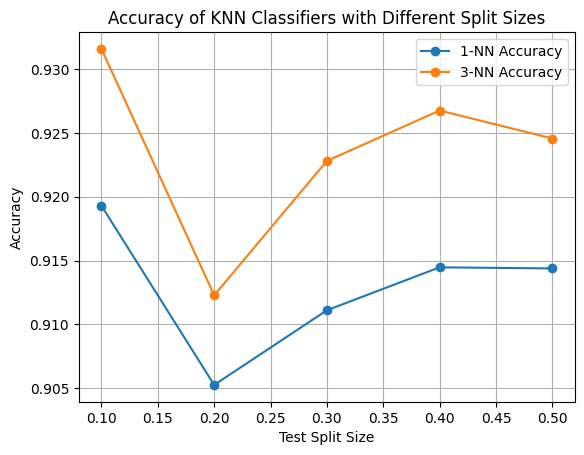

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Load the iris dataset
iris = datasets.load_breast_cancer()
X, y = iris.data, iris.target

# Define split sizes to evaluate
split_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

# Store results
results = {
    'split_size': [],
    'knn1_accuracy': [],
    'knn3_accuracy': []
}

for split_size in split_sizes:
    knn1_accuracies = []
    knn3_accuracies = []

    # Perform multiple splits for each split size
    for _ in range(10):  # 10 splits for robustness
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size)

        # KNN with n_neighbors=1
        knn1 = KNeighborsClassifier(n_neighbors=1)
        knn1.fit(X_train, y_train)
        y_pred_knn1 = knn1.predict(X_test)
        knn1_accuracy = accuracy_score(y_test, y_pred_knn1)
        knn1_accuracies.append(knn1_accuracy)

        # KNN with n_neighbors=3
        knn3 = KNeighborsClassifier(n_neighbors=3)
        knn3.fit(X_train, y_train)
        y_pred_knn3 = knn3.predict(X_test)
        knn3_accuracy = accuracy_score(y_test, y_pred_knn3)
        knn3_accuracies.append(knn3_accuracy)

    # Store average accuracies for this split size
    results['split_size'].append(split_size)
    results['knn1_accuracy'].append(np.mean(knn1_accuracies))
    results['knn3_accuracy'].append(np.mean(knn3_accuracies))

# Print results
for i in range(len(split_sizes)):
    print(f"Split size: {results['split_size'][i]}")
    print(f"  1-NN Accuracy: {results['knn1_accuracy'][i]:.2f}")
    print(f"  3-NN Accuracy: {results['knn3_accuracy'][i]:.2f}")

# Plot the results for better visualization
import matplotlib.pyplot as plt

plt.plot(results['split_size'], results['knn1_accuracy'], label='1-NN Accuracy', marker='o')
plt.plot(results['split_size'], results['knn3_accuracy'], label='3-NN Accuracy', marker='o')
plt.xlabel('Test Split Size')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN Classifiers with Different Split Sizes')
plt.legend()
plt.grid(True)
plt.show()